# Práctica 7b: análisis de regresión lineal múltiple

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
file = '../../pmsm_temperature_data.csv'
df = pd.read_csv(file)
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [7]:
target = df["pm"]
data = df.drop("pm",1) 
data

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245722,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,1.013417,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.999157,0.830504,0.490581,72


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.1)

In [9]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Para comprobar la exactitud de una regresión, scikit-learn proporciona la función score(X, y) que evalúa el modelo en los datos de la prueba:

In [10]:
lr.score(X_test, Y_test)

0.77133351319546

La precisión global es de 83.64%, lo que es un resultado aceptable considerando la no linealidad del conjunto de datos original, pero también puede ser influenciado por la subdivisión hecha por train_test_split (como en nuestro caso). En cambio, para la validación cruzada de k-fold, podemos utilizar la función cross_val_score(), que funciona con todos los métodos de aprendizaje.

In [13]:
scores = cross_val_score(lr, data, target, cv=7, scoring='neg_mean_squared_error')

In [14]:
scores.mean()

-0.25385963384059657

In [15]:
scores.std()

0.08534988115111344

Otra métrica muy importante utilizada en las regresiones se llama el coeficiente $R^2$ . Mide la cantidad de varianza en la predicción que se explica por el conjunto de datos. En otras palabras, es la diferencia entre la muestra y la predicción. Para nuestros propósitos, los valores de R2 cercanos a 1 significan una regresión casi perfecta, mientras que los valores cercanos a 0 (o negativos) implican un mal modelo. Usar esta métrica es bastante fácil con la validación cruzada:

In [16]:
scores = cross_val_score(lr, data, target, cv=10, scoring='r2')

In [17]:
scores.mean()

0.7030625481664313

In [18]:
scores.std()

0.10754467373709736

In [19]:
print('y = ' + str(lr.intercept_) + ' ')

y = 0.11983864416683063 


In [20]:
for i, c in enumerate(lr.coef_):
          print(str(c) + ' * x' + str(i))

0.22883190713983176 * x0
-0.24401323510835232 * x1
-0.023212799033383982 * x2
-0.34685363850783885 * x3
0.32856371381863547 * x4
0.05493393947165956 * x5
0.17754011983226756 * x6
-0.035648786064819644 * x7
-1.5455589020304075 * x8
4.5208900906451825 * x9
-2.2634742578999973 * x10
-0.002384564417972226 * x11


the r-squared is:  0.6336150530012772
the coefficient (value of a) for age, weight, constant is:  [ 1.2538269  -0.50311809  0.02054227]


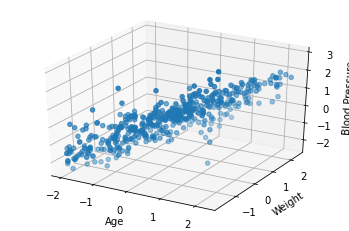

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create arrays for the data points
X = []
Y = []

#read the csv file
names =["pm","stator_tooth","stator_yoke"]
df = df[names]
df = df.sample(n = 500)
df.to_csv("Archivo.csv", header = True, index = False)
csvReader = open('Archivo.csv')
#skips the header line
csvReader.readline()

for line in csvReader:
    y, x1, x2 = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term at the end
    Y.append(float(y))

# use numpy arrays so that we can use linear algebra later
X = np.array(X)
Y = np.array(Y)

# graph the data
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')

# Use Linear Algebra to solve
a = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
predictedY = np.dot(X, a)

# calculate the r-squared
SSres = Y - predictedY
SStot = Y - Y.mean()
rSquared = 1 - (SSres.dot(SSres) / SStot.dot(SStot))
print("the r-squared is: ", rSquared)
print("the coefficient (value of a) for age, weight, constant is: ", a)

In [ ]:
# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = combinedArrays.dot(a)

In [ ]:
# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y, color='r', label='Actual BP')
ax.scatter(X[:, 0], X[:, 1], predictedY, color='g', label='Predicted BP')
ax.plot_trisurf(combinedArrays[:, 0], combinedArrays[:, 1], Z, alpha=0.5)
ax.set_xlabel('Age')
ax.set_ylabel('Weight')
ax.set_zlabel('Blood Pressure')
ax.legend()
plt.show()